In [45]:
import pandas as pd
import numpy as np
import math
from textblob import TextBlob as tb
import re
from nltk.corpus import stopwords
import neattext.functions as nfx
import emoji
import advertools as adv
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from PIL import Image

In [3]:
july=pd.read_csv('PREPROCESSED_JULY.csv')

### -----Tokenizing clean tweet------

In [4]:
july['tokenized_Tweet']=np.nan

In [5]:
def tokenizing(text,i=0):
    text=tb(text)
    token_text=text.words
    token_text
    july['tokenized_Tweet'][i]=token_text

In [6]:
tokenizing(july['clean_tweet'][0],0)

<ipython-input-5-554cdc7c7420>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  july['tokenized_Tweet'][i]=token_text
C:\Users\AYUSH\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [7]:
for i in range(0,1993):
    text=july['clean_tweet'][i]
    tokenizing(text,i)

<ipython-input-5-554cdc7c7420>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  july['tokenized_Tweet'][i]=token_text


In [8]:
july[['clean_tweet','tokenized_Tweet']]

,clean_tweet,tokenized_Tweet
0,14 COVID admissions so far,"[14, COVID, admissions, so, far]"
1,Uggah: Sarawak still free of Covid19 Delta var...,"[Uggah, Sarawak, still, free, of, Covid19, Del..."
2,Following Covid 19 guidelines,"[Following, Covid, 19, guidelines]"
3,My parents senior citizens and vaccinated are ...,"[My, parents, senior, citizens, and, vaccinate..."
4,Fastspreading Delta Variant Vaccination Rates ...,"[Fastspreading, Delta, Variant, Vaccination, R..."
...,...,...
1988,Double vaccines seems to protect against varia...,"[Double, vaccines, seems, to, protect, against..."
1989,Done with both the doses of Covid 19 vaccine T...,"[Done, with, both, the, doses, of, Covid, 19, ..."
1990,Saluting the real worriers of COVID 19… @ Kolkata,"[Saluting, the, real, worriers, of, COVID, 19…..."
1991,sir passengers who have been fully vaccinated...,"[sir, passengers, who, have, been, fully, vacc..."


### ----- Removing stopwords from tokens----

In [9]:
july['filteredToken']=np.nan

In [10]:
text_set=set(july['tokenized_Tweet'][0])
stop_set=set(stopwords.words("english"))
july['filteredToken'][0]=list(text_set-stop_set)

<ipython-input-10-d7a0ecb2f80a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  july['filteredToken'][0]=list(text_set-stop_set)
C:\Users\AYUSH\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [11]:
stop_set=set(stopwords.words("english"))
for i in range(0,1993):
    text_set=set(july['tokenized_Tweet'][i])
    july['filteredToken'][i]=list(text_set-stop_set)#set difference operation

<ipython-input-11-e4df90893d0c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  july['filteredToken'][i]=list(text_set-stop_set)#set difference operation


In [12]:
july[['tokenized_Tweet','filteredToken']]

,tokenized_Tweet,filteredToken
0,"[14, COVID, admissions, so, far]","[far, admissions, 14, COVID]"
1,"[Uggah, Sarawak, still, free, of, Covid19, Del...","[Delta, Sarawak, Covid19, free, still, Uggah, ..."
2,"[Following, Covid, 19, guidelines]","[Following, Covid, guidelines, 19]"
3,"[My, parents, senior, citizens, and, vaccinate...","[Hospital, citizens, Please, way, Covid, Blair..."
4,"[Fastspreading, Delta, Variant, Vaccination, R...","[Fastspreading, Highlights, Weekly, Reintroduc..."
...,...,...
1988,"[Double, vaccines, seems, to, protect, against...","[Double, agency, reports, vaccines, European, ..."
1989,"[Done, with, both, the, doses, of, Covid, 19, ...","[Covid, 19, got, Those, vaccines, doses, loved..."
1990,"[Saluting, the, real, worriers, of, COVID, 19…...","[real, 19…, Kolkata, COVID, worriers, Saluting]"
1991,"[sir, passengers, who, have, been, fully, vacc...","[RT, PCR, interest, going, passengers, best, s..."


In [13]:
def get_sentiment(text):
    text = tb(text)
    sentiment_polarity = text.sentiment.polarity
    sentiment_subjectivity = text.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [14]:
get_sentiment(july['clean_tweet'][0])

{'polarity': 0.1, 'subjectivity': 1.0, 'sentiment': 'Positive'}

In [15]:
july['sentiment_results'] = july['clean_tweet'].apply(get_sentiment)

In [16]:
july.head()

,Unnamed: 0,tweet,clean_tweet,hastags,attherate,urls,emojis,tokenized_Tweet,filteredToken,sentiment_results
0,0,@anileshmahajan @tsrawatbjp @TIRATHSRAWAT @BJP...,14 COVID admissions so far,[],"['@anileshmahajan', '@tsrawatbjp', '@TIRATHSRA...",[],[],"[14, COVID, admissions, so, far]","[far, admissions, 14, COVID]","{'polarity': 0.1, 'subjectivity': 1.0, 'sentim..."
1,1,Uggah: Sarawak still free of Covid-19 Delta va...,Uggah: Sarawak still free of Covid19 Delta var...,[],[],['https://t.co/BtjONCXGgI'],[],"[Uggah, Sarawak, still, free, of, Covid19, Del...","[Delta, Sarawak, Covid19, free, still, Uggah, ...","{'polarity': 0.4, 'subjectivity': 0.8, 'sentim..."
2,2,@RomainSandro Following Covid 19 guidelines.,Following Covid 19 guidelines,[],['@RomainSandro'],[],[],"[Following, Covid, 19, guidelines]","[Following, Covid, guidelines, 19]","{'polarity': 0.0, 'subjectivity': 0.1, 'sentim..."
3,3,"My parents, senior citizens and vaccinated are...",My parents senior citizens and vaccinated are ...,[],"['@PMOIndia', '@AiFlywith', '@airindiain']",[],[],"[My, parents, senior, citizens, and, vaccinate...","[Hospital, citizens, Please, way, Covid, Blair...","{'polarity': -0.04583333333333334, 'subjectivi..."
4,4,"Fast-spreading Delta Variant, Vaccination Rate...",Fastspreading Delta Variant Vaccination Rates ...,[],['@medscape'],['https://t.co/Aia0dGOybP'],[],"[Fastspreading, Delta, Variant, Vaccination, R...","[Fastspreading, Highlights, Weekly, Reintroduc...","{'polarity': 0.0, 'subjectivity': 0.0, 'sentim..."


In [17]:
july = july.join(pd.json_normalize(july['sentiment_results']))

In [18]:
july.head()

,Unnamed: 0,tweet,clean_tweet,hastags,attherate,urls,emojis,tokenized_Tweet,filteredToken,sentiment_results,polarity,subjectivity,sentiment
0,0,@anileshmahajan @tsrawatbjp @TIRATHSRAWAT @BJP...,14 COVID admissions so far,[],"['@anileshmahajan', '@tsrawatbjp', '@TIRATHSRA...",[],[],"[14, COVID, admissions, so, far]","[far, admissions, 14, COVID]","{'polarity': 0.1, 'subjectivity': 1.0, 'sentim...",0.100000,1.000000,Positive
1,1,Uggah: Sarawak still free of Covid-19 Delta va...,Uggah: Sarawak still free of Covid19 Delta var...,[],[],['https://t.co/BtjONCXGgI'],[],"[Uggah, Sarawak, still, free, of, Covid19, Del...","[Delta, Sarawak, Covid19, free, still, Uggah, ...","{'polarity': 0.4, 'subjectivity': 0.8, 'sentim...",0.400000,0.800000,Positive
2,2,@RomainSandro Following Covid 19 guidelines.,Following Covid 19 guidelines,[],['@RomainSandro'],[],[],"[Following, Covid, 19, guidelines]","[Following, Covid, guidelines, 19]","{'polarity': 0.0, 'subjectivity': 0.1, 'sentim...",0.000000,0.100000,Neutral
3,3,"My parents, senior citizens and vaccinated are...",My parents senior citizens and vaccinated are ...,[],"['@PMOIndia', '@AiFlywith', '@airindiain']",[],[],"[My, parents, senior, citizens, and, vaccinate...","[Hospital, citizens, Please, way, Covid, Blair...","{'polarity': -0.04583333333333334, 'subjectivi...",-0.045833,0.391667,Negative
4,4,"Fast-spreading Delta Variant, Vaccination Rate...",Fastspreading Delta Variant Vaccination Rates ...,[],['@medscape'],['https://t.co/Aia0dGOybP'],[],"[Fastspreading, Delta, Variant, Vaccination, R...","[Fastspreading, Highlights, Weekly, Reintroduc...","{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral


In [19]:
july['sentiment'].value_counts()

Positive    879
Neutral     693
Negative    421
Name: sentiment, dtype: int64

C:\Users\AYUSH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

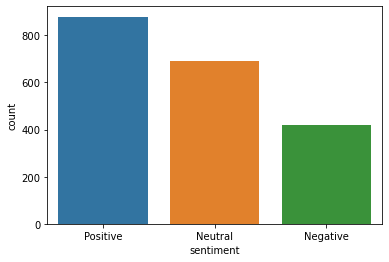

In [20]:
sns.countplot(july['sentiment'])

In [21]:
positive_tweet = july[july['sentiment'] == 'Positive']['clean_tweet']
neutral_tweet = july[july['sentiment'] == 'Neutral']['clean_tweet']
negative_tweet = july[july['sentiment'] == 'Negative']['clean_tweet']

In [22]:
positive_tweet_list = positive_tweet.apply(nfx.remove_stopwords).tolist()
negative_tweet_list = negative_tweet.apply(nfx.remove_stopwords).tolist()
neutral_tweet_list = neutral_tweet.apply(nfx.remove_stopwords).tolist()

In [23]:
pos_tokens = [token for line in positive_tweet_list  for token in line.split()]
neg_tokens = [token for line in negative_tweet_list  for token in line.split()]
neut_tokens = [token for line in neutral_tweet_list  for token in line.split()]

In [24]:
def get_tokens(docx,num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [25]:
most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neut_words = get_tokens(neut_tokens)

In [26]:
neg_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])
pos_df = pd.DataFrame(most_common_pos_words.items(),columns=['words','scores'])
neut_df = pd.DataFrame(most_common_neut_words.items(),columns=['words','scores'])

# ---Negative Words ---

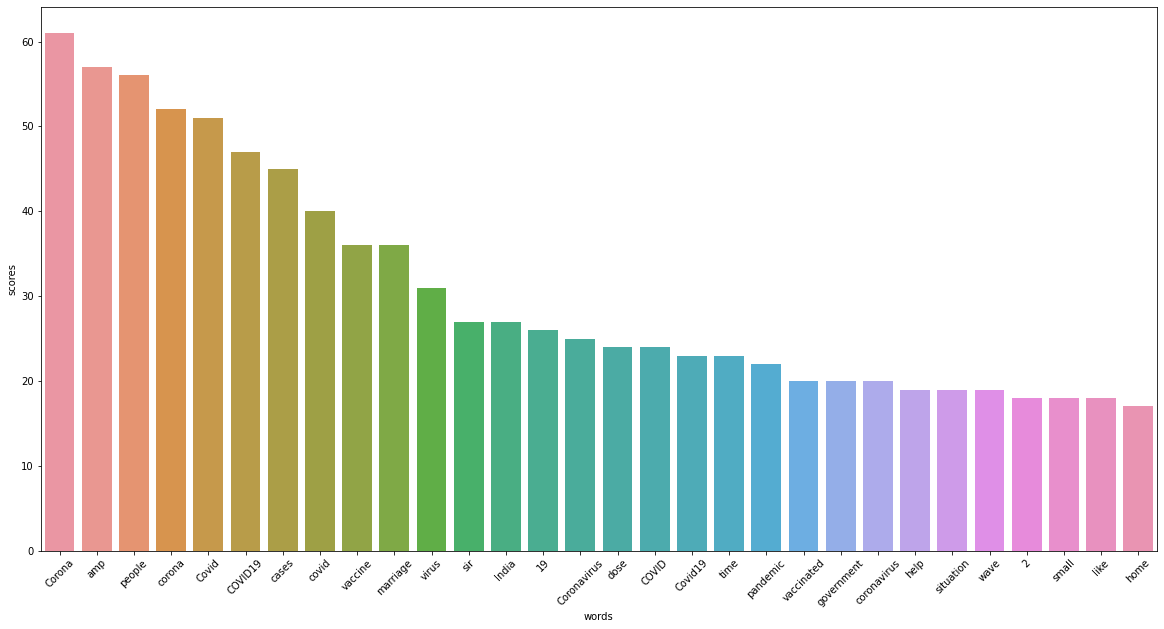

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neg_df)
plt.xticks(rotation=45)
plt.show()

# ---Positive Words---

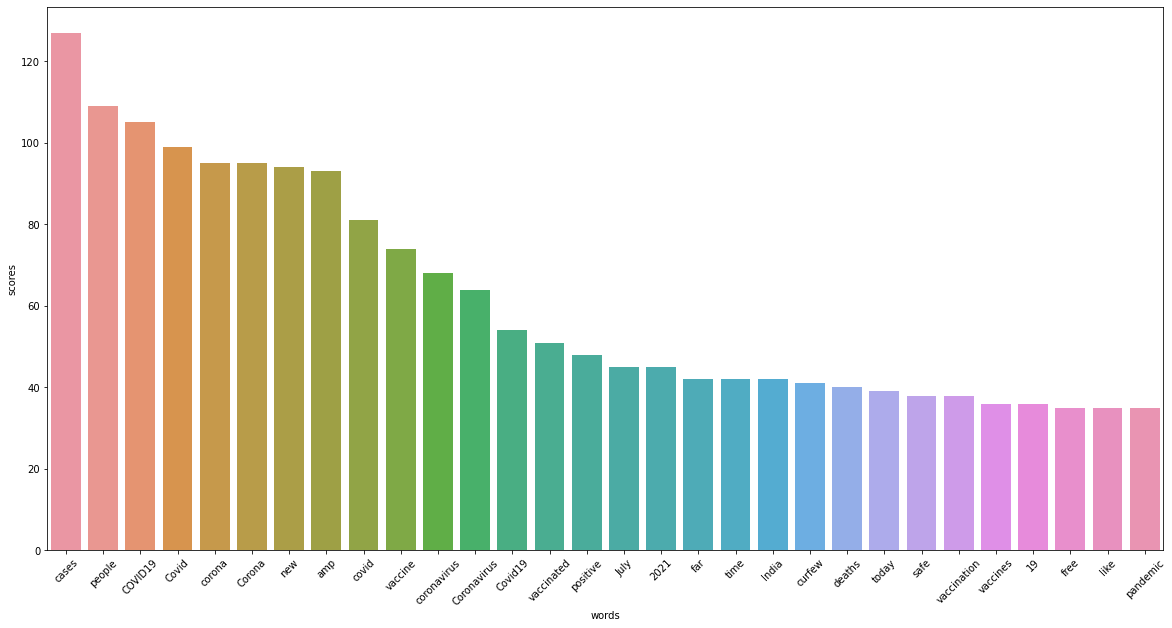

In [28]:
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=pos_df)
plt.xticks(rotation=45)
plt.show()

# ---Neutral words---

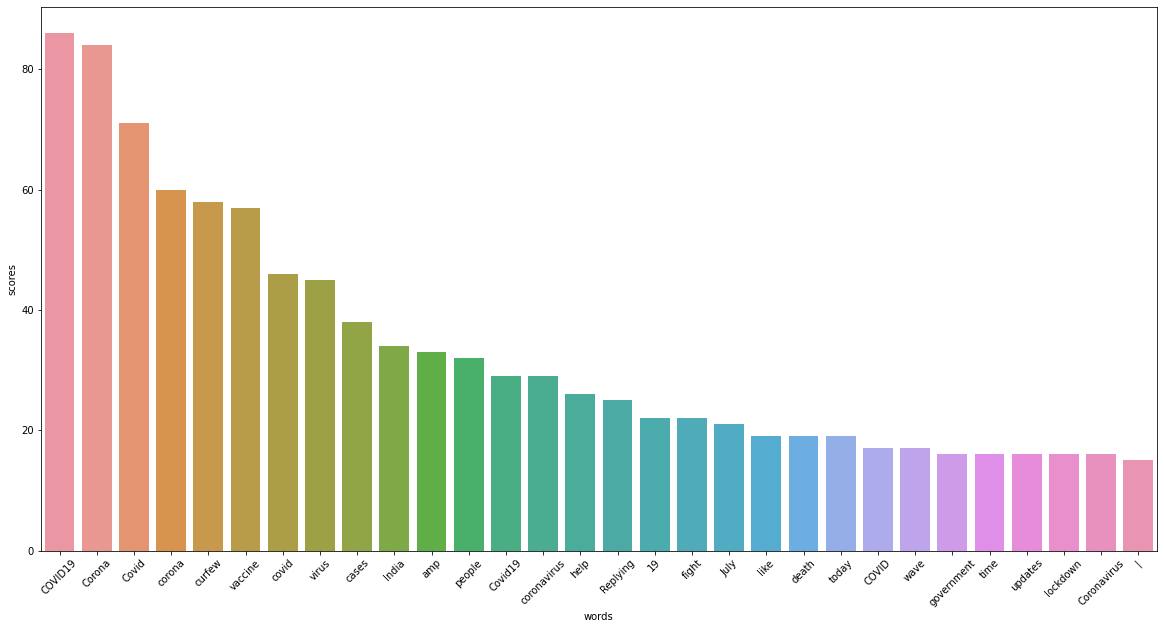

In [29]:
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neut_df)
plt.xticks(rotation=45)
plt.show()

# ----Total Tweet--- 

In [30]:
tweets=july['clean_tweet']

In [31]:
tweet_list = tweets.apply(nfx.remove_stopwords).tolist()
tweets_tokens= [token for line in tweet_list for token in line.split()]

In [32]:
def get_tweets_tokens(docx,num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [33]:
most_common_words = get_tweets_tokens(tweets_tokens)
tweet_df = pd.DataFrame(most_common_words.items(),columns=['words','scores'])

# ----- most used word in july -----

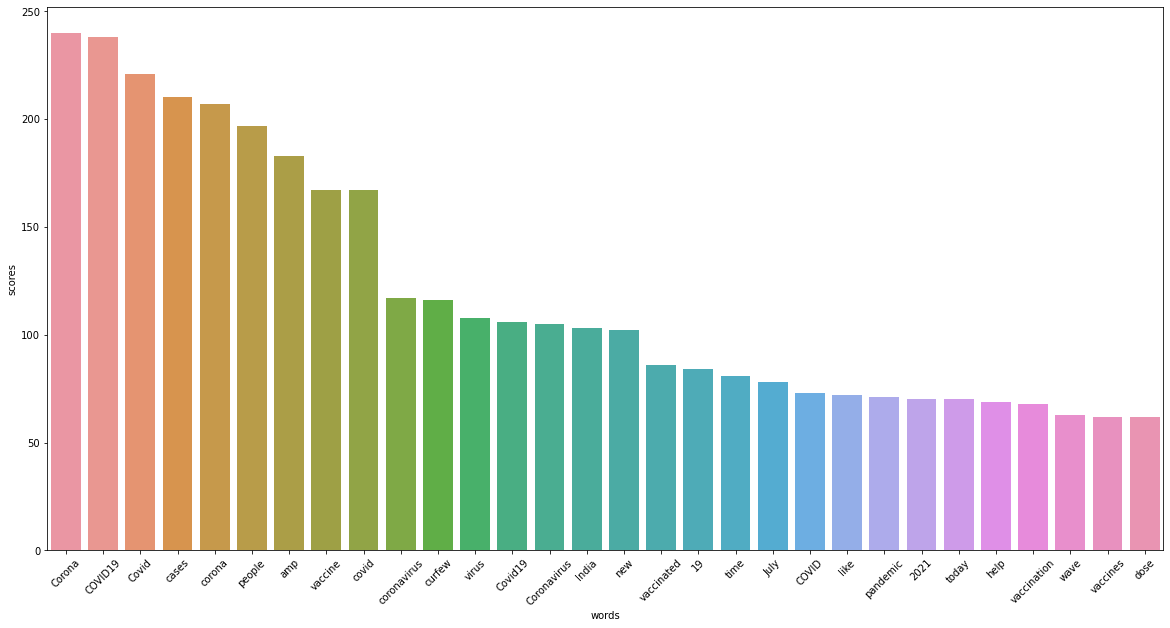

In [34]:
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=tweet_df)
plt.xticks(rotation=45)
plt.show()

# ---Word Cloud---

In [42]:
tweet_docx = ' '.join(tweets_tokens)

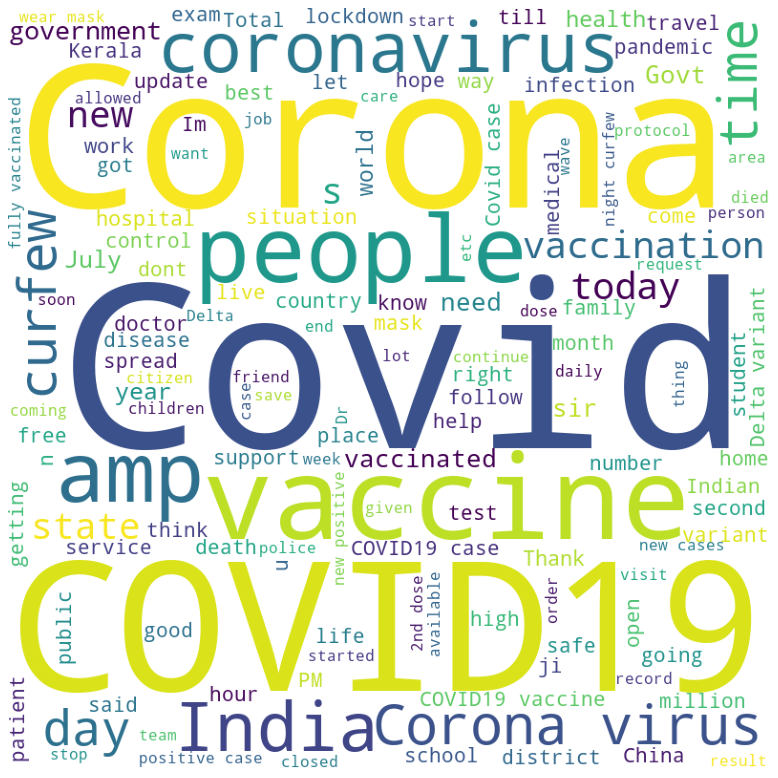

In [43]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 12).generate(tweet_docx) 
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 5) 
  
plt.show() 

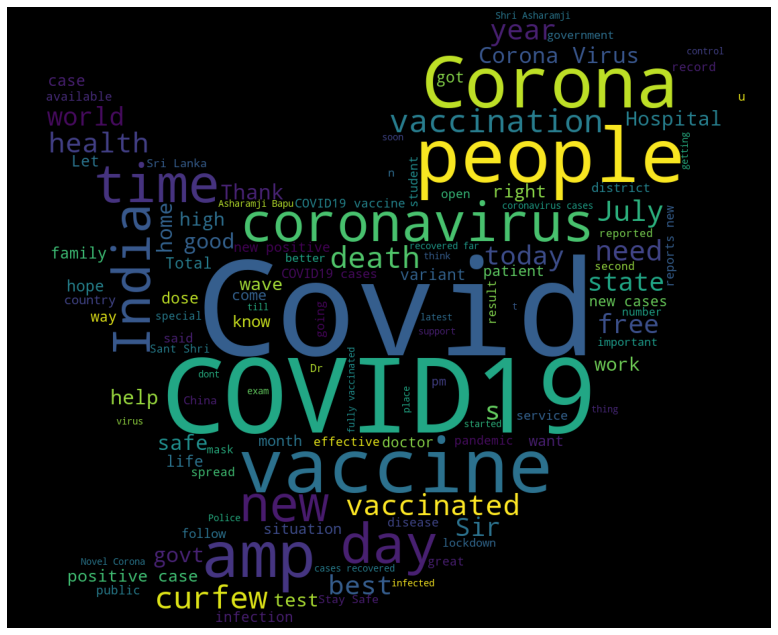

In [60]:
mask = np.array(Image.open('Twitter-PNG-Image.png'))
wordcloud = WordCloud(mask=mask,
                      background_color='black',
                      min_font_size=12, width=mask.shape[1], height=mask.shape[0]).generate(tweet_docx)
plt.figure(figsize=(12, 12), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=5)

plt.show()
